## pre-requirements

- 라이브러리 설치
  - [깃허브-KcELECTRA](https://github.com/Beomi/KcELECTRA)
- 구글 드라이브 연결 



In [1]:
# for Torch DEBUG
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"


In [2]:
!pip install transformers
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 12.9 MB/s 
     |████████████████████████████████| 596 kB 14.7 MB/s 
     |████████████████████████████████| 101 kB 7.2 MB/s 
     |████████████████████████████████| 6.6 MB 51.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 한국어 악성댓글 데이터셋
# !git clone https://github.com/ZIZUN/korean-malicious-comments-dataset

Cloning into 'korean-malicious-comments-dataset'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 30 (delta 15), reused 15 (delta 5), pack-reused 0
Unpacking objects: 100% (30/30), done.


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
# pytorch 사용할거라 tensorflow 임포트 안함

np.random.seed(42)

In [4]:
from google.colab import drive
drive.mount('/gdrive')

# 파일을 못찾을 경우, 이렇게 확인을 해야 함!!
import os
os.chdir("/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석")
!ls -l data

Mounted at /gdrive
total 52151
-rw------- 1 root root  188900 Jul  7 08:13 sample_submission.csv
drwx------ 2 root root    4096 Jul 27 10:41 submissions
-rw------- 1 root root 2679138 Jul  7 08:13 test.csv
-rw------- 1 root root 8288753 Jul 24 11:11 test_mecab.csv
-rw------- 1 root root 7841571 Jul 24 11:35 test_okt.csv
-rw------- 1 root root 7650515 Jul 25 08:57 test_okt_stem.csv
-rw------- 1 root root 2738015 Jul  7 08:13 train.csv
-rw------- 1 root root 8366728 Jul 24 11:09 train_mecab.csv
-rw------- 1 root root 7916589 Jul 24 11:29 train_okt.csv
-rw------- 1 root root 7726432 Jul 25 07:25 train_okt_stem.csv


## 전체 과정

1. ..
2. ..
3. ..

__참고자료__

- ['KcELECTRA'로 악성댓글 분류하기](https://www.dinolabs.ai/400) : Torch
- ['KcELECTRA'로 네이버 영화리뷰 감성분석](https://ainize.ai/workspace/view?ipynb=https://raw.githubusercontent.com/scy6500/KcELECTRA-NSMC/main/KcELECTRA%20NSMC.ipynb&imageId=HQ8gBR4qbSwEEgcoJL4G&utm_medium=social&utm_source=medium&utm_campaign=everyone%20ai&utm_content=kcelectra)

### KcELECTRA Performance

> 💡 NOTE 💡 

General Corpus로 학습한 KoELECTRA가 보편적인 task에서는 성능이 더 잘 나올 가능성이 높습니다.<br/>
KcBERT/KcELECTRA는 User genrated, Noisy text에 대해서 보다 잘 동작하는 PLM입니다.

|                    | Size<br/>(용량) | **NSMC**<br/>(acc) | **Naver NER**<br/>(F1) | **PAWS**<br/>(acc) | **KorNLI**<br/>(acc) | **KorSTS**<br/>(spearman) | **Question Pair**<br/>(acc) | **KorQuaD (Dev)**<br/>(EM/F1) |
| :----------------- | :-------------: | :----------------: | :--------------------: | :----------------: | :------------------: | :-----------------------: | :-------------------------: | :---------------------------: |
| **KcELECTRA-base** |      475M       |     **91.71**      |         86.90          |       74.80        |        81.65         |           82.65           |          **95.78**          |         70.60 / 90.11         |
| KcBERT-Base        |      417M       |       89.62        |         84.34          |       66.95        |        74.85         |           75.57           |            93.93            |         60.25 / 84.39         |
| KcBERT-Large       |      1.2G       |       90.68        |         85.53          |       70.15        |        76.99         |           77.49           |            94.06            |         62.16 / 86.64         |
| KoBERT             |      351M       |       89.63        |         86.11          |       80.65        |        79.00         |           79.64           |            93.93            |         52.81 / 80.27         |
| XLM-Roberta-Base   |      1.03G      |       89.49        |         86.26          |       82.95        |        79.92         |           79.09           |            93.53            |         64.70 / 88.94         |
| HanBERT            |      614M       |       90.16        |         87.31          |       82.40        |        80.89         |           83.33           |            94.19            |         78.74 / 92.02         |
| KoELECTRA-Base     |      423M       |       90.21        |         86.87          |       81.90        |        80.85         |           83.21           |            94.20            |         61.10 / 89.59         |
| KoELECTRA-Base-v2  |      423M       |       89.70        |         87.02          |       83.90        |        80.61         |           84.30           |            94.72            |         84.34 / 92.58         |
| KoELECTRA-Base-v3  |      423M       |       90.63        |       **88.11**        |     **84.45**      |      **82.24**       |         **85.53**         |            95.25            |       **84.83 / 93.45**       |
| DistilKoBERT       |      108M       |       88.41        |         84.13          |       62.55        |        70.55         |           73.21           |            92.48            |         54.12 / 77.80         |


In [5]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

print(torch.__version__)

1.12.0+cu113


In [6]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [7]:
# !pip install wandb
# !wandb login
# API key: 145d9076018baf7d669870a83a0f3d9413857d2c

os.environ["WANDB_DISABLED"] = "true"

### 1. 데이터 로딩

- train_df 읽어오기
- reviews 전처리
  - 한글 자모음, 웹주소, 이메일, 전화번호 제거
  - 영어, 숫자, 특수문자 제거


In [8]:
# data_path = '~/Workspaces/keras/dacon-shopping-mall/review_data'
data_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# 리뷰 평점 원본 데이터
file_path = f'{data_path}/train.csv'

## Pickle 로딩
train_df = pd.read_csv(file_path)
# train_df = train_df.drop(['Unnamed: 0'], axis='columns')
print(train_df.shape)

train_df
# 24984 rows × 8 columns

(25000, 3)


,id,reviews,target
0,0,조아요 처음구입 싸게햇어요,2
1,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...,1
2,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2
3,3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...,2
4,4,튼튼하고 손목을 잘 받쳐주네요~,5
...,...,...,...
24995,24995,일단향이너무너무좋은데지속력만좋다면좋겠지만..워낙저렴해그래도좋아여,5
24996,24996,동일한 업체에서 발송하고 한 상자로 배송되었는데 택배비는 이중 처리되었습니다.,2
24997,24997,향이 좋아요!! 다른 향도 시켜보고 싶어요,4
24998,24998,펼쳐보니 끝부분쯤에 50cm정도 찟어져 있습니다 날짜관계로 구냥 사용합니다,2


In [ ]:
# 한글 자모음 찾아보기 ==> 4584
kor_df = train_df[train_df['reviews'].str.count(r'[ㄱ-ㅎ|ㅏ-ㅣ]+')>0]
print('자모음 ==>', len(kor_df))
print(kor_df['reviews'].head())

print('--'*30, end='\n\n')

# 영어 찾아보기 ==> 537
eng_df = train_df[train_df['reviews'].str.count(r'[a-zA-Z]+')>0]
print('영어 ==>', len(eng_df))
print(eng_df['reviews'].head())

print('--'*30, end='\n\n')

# 숫자 찾아보기 ==> 2425
num_df = train_df[train_df['reviews'].str.count(r'[0-9]+')>0]
print('숫자 ==>', len(num_df))
print(num_df['reviews'].head())

print('--'*30, end='\n\n')

# 특수문자 찾아보기 ==> 13360
spc_df = train_df[train_df['reviews'].str.count(r'[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]+')>0]
print('특수문자 ==>', len(spc_df))
print(spc_df['reviews'].head())

print('--'*30, end='\n\n')

# 웹주소 찾아보기 ==> 2
num_df = train_df[train_df['reviews'].str.count(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')>0]
print('웹주소 ==>', len(num_df))
print(num_df['reviews'].head())

print('--'*30, end='\n\n')

# 이메일 찾아보기 ==> 0
num_df = train_df[train_df['reviews'].str.count(r'([A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@[A-Za-z0-9-]+(\.[A-Z|a-z]{2,})+')>0]
print('이메일 ==>', len(num_df))
print(num_df['reviews'].head())

print('--'*30, end='\n\n')

# 전화번호 찾아보기 ==> 4
num_df = train_df[train_df['reviews'].str.count(r'0[0-9]{1,2}[-]{0,1}[0-9]{3,4}[-]{0,1}[0-9]{4}')>0]
print('전화번호 ==>', len(num_df))
print(num_df['reviews'].head())


자모음 ==> 4584
1     생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...
2     디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...
15                            다른거는 다만족하는데 나사부분이ㅈ맘엥ㆍㄴ들어서
20                                     강추해요 너무 잘쓰고 있어ㅇᆢ
21    먼지가적다고하는데 전적은지모르겠어요. 극세사라고하던데..어느면이극세사인지도모르겠고요...
Name: reviews, dtype: object
------------------------------------------------------------

영어 ==> 537
105    물건이 잘못왔습니다. 제가주문한건 A3000u 인데 A3000ua 가왔스빈다. 일단...
154                                   px에있는 로카티 제질하고 달라요
189    일단 상품은 좋지 못해요 버튼도 확인 안되서 as전화하니 남직원이 불친절 하네요 돈...
198    분명 ad실내등 주문했는데 md실내등으로 왔네요 뜯고 작업할려니 뭐가안맞아서 보니 ...
244                        옵션추가해서 LED불들어오는걸로구매했는데 불량이네요.
Name: reviews, dtype: object
------------------------------------------------------------

숫자 ==> 2425
1     생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...
5     배송은 먼저 구입하신 분들께서 오래걸린다고 하여 참고 기달렸습니다 생각보다 일찍도착...
39                    좋네요 성인6명이앉기딱일듯요 색상도 괜찮고 다리도 튼튼하네요
42    양념통5개 오일병5개 주문했는데 양념통 뚜껑하나가 스텐마감이 안되어있어서 검지

In [9]:
# 한글 자모음 제거
train_df['reviews_tmp'] = train_df['reviews'].replace(r'[ㄱ-ㅎ|ㅏ-ㅣ]+', '', regex=True)
# 나중에 제거하기 보다는 먼저 공백으로 치환해 형태소 분석 결과를 더 좋게 만들어 보고자 함!

# 웹주소 제거
train_df['reviews_tmp'] = train_df['reviews_tmp'].replace(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', regex=True)
# 이메일 제거
train_df['reviews_tmp'] = train_df['reviews_tmp'].replace(r'([A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@[A-Za-z0-9-]+(\.[A-Z|a-z]{2,})+', '', regex=True)
# 전화번호 제거
train_df['reviews_tmp'] = train_df['reviews_tmp'].replace(r'0[0-9]{1,2}[-]{0,1}[0-9]{3,4}[-]{0,1}[0-9]{4}', '', regex=True)

In [10]:
# 한글만 남기고 모두 제거
train_df['reviews_tmp'] = train_df['reviews_tmp'].replace(r'[^가-힣 ]+', '', regex=True)
# 확인
train_df.iloc[:20]['reviews_tmp'].tolist()

['조아요 처음구입 싸게햇어요',
 '생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데 천원가량 주고 사기 너무 아깝네요',
 '디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져있네요  귀찮아서 그냥쓰려구요 배송기사님은 친절하셨어요',
 '기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다 샘플 써보고 마음에 들어 구매해 사용중 같은 제품을 팔지 않아 할수 없이 플러스를 구매했는데요 감고나도 머리가 개운하지 않고 간지럽네요 저랑은 잘 안맞는듯해요',
 '튼튼하고 손목을 잘 받쳐주네요',
 '배송은 먼저 구입하신 분들께서 오래걸린다고 하여 참고 기달렸습니다 생각보다 일찍도착해서 좋았구요하루전날 배송 아저씨가 전화와서 내일시사이에 온다고 하더니 시에왔어요화나',
 '타이밍이 좋았는지 배송도 빠르고 맛있었어요 크기가 두가지가 있길래 큰걸 사봤는데 기존에 사먹어봤던거랑 크기 차이는 없네요 그래도 신선하고 맛있어요',
 '상품 퀄리티가 좋지 않아요',
 '재구매 평소 사용하던 제품이에요 한번에 쟁여두려 여러개 삽니다 ',
 '두께 때문에 별로네요',
 '재구매 항상 여기서만 주문해서 잘 쓰고있어요 후딱쓰기좋아요 크기도 좋구',
 '화면하고 전혀틀림',
 '재구매 좋은제품 저렴하게 잘 구매했습니다',
 '너무 잘사용했어요 감사합니다',
 '촉촉하고 피부트러블이없어요 가성비 갑',
 '다른거는 다만족하는데 나사부분이맘엥들어서',
 '재구매 별로별로별로별로 불량품 교환이나 환불 미흡 고객센터 개인 휴대폰번호 이제 다른곳으로 주문 별로별로',
 '튼튼하고좋아요 깔끔하게 정리되어서좋아요',
 '빠른배송 신속한서비스로 잘 받았습니다',
 '완전 골아서 왔어요 집에서 썩은내가 진동해서 베란다문 열고 그래도 내장이랑 분리 해봤네요 오징어가 다 핑크색으로 변해있더라구요 내장과 분리해도 냄새가나서 버려야할듯 완전 쓰레기를 돈주고 샀네요 제발 이런 상품 팔지 마세요 동네 마트가 더 산선해요']

In [11]:
# 토큰수
train_df['token_size'] = train_df['reviews_tmp'].apply(lambda s: len(s.split()))

# 공백 제외 글자수
import re
train_df['char_size'] = train_df['reviews_tmp'].apply(lambda s: len(re.findall(r'\S',s)) )

# char_size==1 확인 (15건)
print('한글자 리뷰수=', len(train_df[ train_df['char_size']==1 ]))
train_df[ train_df['char_size']==1 ].head(20)
# ==> '굿' 외에는 의미 없음

한글자 리뷰수= 15


,id,reviews,target,reviews_tmp,token_size,char_size
2609,2609,아... .. ... .. ... .. ...,2,아,1,1
5567,5567,핟ㅎㅋㄴㅌㄹㄱㅎ,5,핟,1,1
6477,6477,하....,2,하,1,1
6636,6636,ㅇ로ㅗㅓㅓㅓㅓ,5,로,1,1
6780,6780,휴ㅠㅠㅠㅠㅜ,5,휴,1,1
7675,7675,123445667665433므ㅎㅎ,2,므,1,1
11322,11322,ㄷ근 ㄴㄷㆍㅊ,5,근,1,1
12113,12113,굿!!!^^,5,굿,1,1
13516,13516,ㅇㄻ앎 ㄴㅇㄷ,2,앎,1,1
15785,15785,굿 Hgfvjoihbvfrtujbccswetuuhvcfgyhbbvgdthuijhbv...,4,굿,1,1


In [ ]:
# 한글자 카운트 정렬 ==> '굿' 외에는 쓸게 없다
train_df[train_df['char_size']==1].groupby('reviews_tmp')['id'].nunique().sort_values(ascending=False).reset_index(name='count')

,reviews_tmp,count
0,굿,2
1,로,2
2,굿,1
3,근,1
4,므,1
5,아,1
6,앎,1
7,요,1
8,쩝,1
9,퓨,1


In [12]:
import numpy as np
print('Before 공백, 한글자 제거: len=', len(train_df))

# 공백을 NaN 으로
train_df = train_df.replace(r'^\s*$', np.NaN, regex=True)
# NaN 확인 (pos_tokens=0)
print('count NaN:', train_df.isna().sum(), end='\n\n' )
# NaN 포함열 삭제
train_df = train_df.dropna()

# 한글자 pos_tokens 확인 (pos_tokens=12)
print('count 1-char:', len(train_df[ (train_df['char_size']==1) & ~(train_df['reviews_tmp'].str.contains('굿')) ]), end='\n\n' )
# 한글자 pos_tokens 포함열 삭제 (단, '굿' 제외)
train_df = train_df.drop( train_df[ (train_df['char_size']==1) & ~(train_df['reviews_tmp'].str.contains('굿')) ].index )

print('After 공백, 한글자 제거: len=', len(train_df))
# ==> 모두 12행 제거

Before 공백, 한글자 제거: len= 25000
count NaN: id             0
reviews        0
target         0
reviews_tmp    0
token_size     0
char_size      0
dtype: int64

count 1-char: 12

After 공백, 한글자 제거: len= 24988


### 2. KcELECTRA 로 텍스트 전처리

- train, valid 분할
- 토크나이저 로딩
- 토크나이징 + 패딩

In [13]:
model_name = 'beomi/KcELECTRA-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [14]:
# 모델의 설정이 정수형 라벨을 필요로 해서 int형 label 컬럼을 생성 (모델 로딩시 num_labels=5 설정)
# - 내부적으로 label에 대해 원핫 인코딩 작업 수행함
train_df['label'] = train_df['target'].apply(lambda v: v-1)

# [0~4] label 확인 : num_classes=5
unq_labels, cnt_labels = np.unique(train_df['label'].values, return_counts=True)
print('labels =', dict(zip( unq_labels, cnt_labels )) )

train_df[['target','label']].dtypes

labels = {0: 4499, 1: 7994, 3: 2500, 4: 9995}


target    int64
label     int64
dtype: object

In [15]:
from sklearn.model_selection import train_test_split

# train, valid 분할
data = train_df[['reviews_tmp','label']]
dataset_train, dataset_valid = train_test_split(data, test_size=0.2, random_state=42)

# 내용 확인
print(dataset_train.iloc[0])
print(dataset_train.iloc[-1])

reviews_tmp    빠른 배송 및 제품은 만족하나 선물용으로 구입했는데 박스가 찌그러지고 찢어졌네요
label                                                     1
Name: 18849, dtype: object
reviews_tmp    물건 잘받았습니다 운동화처럼 생겼네요 안전화라서 쿠션감은 떨어집니다
label                                              3
Name: 23665, dtype: object


In [16]:
# 학습 데이터
# ==> 토크나이징 + 패딩 : dim=128
encoded_train = tokenizer(
    dataset_train['reviews_tmp'].tolist(),
    return_tensors='pt',
    max_length=32,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

# 확인
print( encoded_train[0].tokens )
print( encoded_train[0].ids )
print( encoded_train[0].attention_mask )
print()
print('디코딩 :',tokenizer.decode(encoded_train[0].ids))

['[CLS]', '빠른', '배송', '및', '제품', '##은', '만족', '##하나', '선물', '##용으로', '구입', '##했는데', '박스', '##가', '찌그러', '##지고', '찢어', '##졌네', '##요', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
[2, 14159, 19949, 1616, 11293, 4192, 14417, 8159, 15104, 12313, 13175, 8526, 28161, 4050, 14014, 8109, 13927, 9425, 4071, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

디코딩 : [CLS] 빠른 배송 및 제품은 만족하나 선물용으로 구입했는데 박스가 찌그러지고 찢어졌네요 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [17]:
# 학습 데이터
# ==> 토크나이징 + 패딩 : dim=128
encoded_valid = tokenizer(
    dataset_valid['reviews_tmp'].tolist(),
    return_tensors='pt',
    max_length=32,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

print('디코딩 :',tokenizer.decode(encoded_valid[0].ids))
print('디코딩 :',tokenizer.decode(encoded_valid[-1].ids))

디코딩 : [CLS] 소리가 조금 아쉽습니다가격은 만족합니다디자인도 무난합니다 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
디코딩 : [CLS] 우리 귀요미들 주려고 샀어요 특히 초코맛을 좋아하네요 저렴하게 잘 샀어요 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


### 2. BERT 로 텍스트 전처리

- Dataset 클래스 작성
- Dataset 생성



In [18]:
# y_train = np.array( dataset_train['label'].values, dtype='int' )
# y_valid = np.array( dataset_valid['label'].values, dtype='int' )

# 학습 시작 전에 label 데이터가 int형에 1차원인지 확인
print(dataset_train['label'].values.shape, dataset_train['label'].values.dtype)
print(dataset_valid['label'].values.shape, dataset_valid['label'].values.dtype, end='\n\n')
dataset_train['label'].values[0]

# 아닐 경우 ==> ValueError: 
# Target size (torch.Size([64])) must be the same as input size (torch.Size([64, 5]))

(19990,) int64
(4998,) int64



1

In [19]:
from torch.utils.data import Dataset, DataLoader

# 데이터셋 클래스
class ReviewDataset(Dataset):
  def __init__(self, encodings, labels):
    self.encodings = encodings
    self.labels = labels

  def __getitem__(self, idx):
    item = { key: torch.tensor(val[idx]) for key, val in self.encodings.items() }
    item['labels'] = torch.tensor(self.labels[idx])
    return item

  def __len__(self):
    return len(self.labels)


# 데이터셋 생성
train_dataset = ReviewDataset(encoded_train, dataset_train['label'].values)
valid_dataset = ReviewDataset(encoded_valid, dataset_valid['label'].values)

### 3. 모델 생성

- AutoModelForSequenceClassification
- 학습 파라미터 
  - wandb
- 측정 메트릭스
  - precision_recall_fscore_support 함수에서 average='weighted'
    - [multi-label 분류 문제에서 f1 score는 못 사용하는 걸까?](https://aimb.tistory.com/152)

__학습 측정치__

- epochs=5

|Step|	Training Loss|	Validation Loss|	Acc|	F1|	Precision|	Recall|
|----|----|----|----|----|----|----|
|200|	0.172100|	1.634539|	0.617247|	0.618473|	0.625467|	0.617247|
|400|	0.159200|	1.654786|	0.650860|	0.643516|	0.637916|	0.650860|
|600|	0.125500|	1.630619|	0.631853|	0.627805|	0.624225|	0.631853|
|800|	0.086000|	1.870700|	0.641657|	0.635299|	0.631096|	0.641657|
|1000|	0.074500|	2.012760|	0.642857|	0.637065|	0.633939|	0.642857|
|1200|	0.055200|	2.078029|	0.650660|	0.640178|	0.637454|	0.650660|
|1400|	0.039500|	2.198593|	0.644058|	0.640254|	0.638873|	0.644058|

- epochs=10

|Step|	Training Loss|	Validation Loss|	Acc|	F1|	Precision|	Recall|
|----|----|----|----|----|----|----|
|500|	0.777700|	0.749604|	0.685874|	0.641685|	0.638608|	0.685874|
|1000|	0.602700|	0.892312|	0.670468|	0.655054|	0.646385|	0.670468|
|1500|	0.427400|	1.009953|	0.659264|	0.645887|	0.637328|	0.659264|
|2000|	0.272900|	1.313081|	0.640456|	0.638909|	0.639873|	0.640456|
|2500|	0.173400|	1.477160|	0.633053|	0.634402|	0.638874|	0.633053|
|3000|	0.111800|	1.647965|	0.640256|	0.638743|	0.639817|	0.640256|

In [20]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=5)
model.to(device)

Some weights of the model checkpoint at beomi/KcELECTRA-base were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base and are newly initialized: ['classifier.out_proj.bias', 'classifier

ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(50135, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0): ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm

In [46]:
# 성능 시각화 wandb
# https://docs.wandb.ai/guides/integrations/huggingface

# for report_to
# import wandb
# wandb.init(project="review_ratings-kcelectra")

# 학습 파라미터
training_args = TrainingArguments(
    output_dir='./temp/transformers',
    overwrite_output_dir='True',

    num_train_epochs=5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
 
    logging_dir='./temp/logs',
    logging_steps=200,
    evaluation_strategy="steps",
    eval_steps=200,

    # https://discuss.huggingface.co/t/save-only-best-model-in-trainer/8442/8
    save_total_limit=2,
    save_strategy='no',
    load_best_model_at_end=False,

    # 성능 그래프 시각화 유틸리티 (사용안함)
    # report_to="wandb",
    # run_name="transformer-kcelectra_1"
)

#정확도 측정을 위한 함수 정의
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    # average: 'micro', 'macro', 'weighted' or 'samples' 
    # 참고 https://aimb.tistory.com/152
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'acc': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [47]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

# wandb.finish()   # 리포트 종료: report_to

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 19990
  Num Epochs = 5
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 1565
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


Step,Training Loss,Validation Loss,Acc,F1,Precision,Recall
200,0.172100,1.634539,0.617247,0.618473,0.625467,0.617247
400,0.159200,1.654786,0.650860,0.643516,0.637916,0.650860
600,0.125500,1.630619,0.631853,0.627805,0.624225,0.631853
800,0.086000,1.870700,0.641657,0.635299,0.631096,0.641657
1000,0.074500,2.012760,0.642857,0.637065,0.633939,0.642857
1200,0.055200,2.078029,0.650660,0.640178,0.637454,0.650660
1400,0.039500,2.198593,0.644058,0.640254,0.638873,0.644058


***** Running Evaluation *****
  Num examples = 4998
  Batch size = 64
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.
***** Running Evaluation *****
  Num examples = 4998
  Batch size = 64
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.
***** Running Evaluation *****
  Num examples = 4998
  Batch size = 64
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().

TrainOutput(global_step=1565, training_loss=0.09521348880121883, metrics={'train_runtime': 703.0607, 'train_samples_per_second': 142.164, 'train_steps_per_second': 2.226, 'total_flos': 1643666146204800.0, 'train_loss': 0.09521348880121883, 'epoch': 5.0})

In [49]:
trainer.evaluate(valid_dataset)

"""
{'epoch': 5.0,
 'eval_acc': 0.6546,
 'eval_f1': 0.6546,
 'eval_loss': 1.5792670249938965,
 'eval_precision': 0.6546,
 'eval_recall': 0.6546,
 'eval_runtime': 8.7521,
 'eval_samples_per_second': 571.294,
 'eval_steps_per_second': 9.026}

{'epoch': 10.0,
 'eval_acc': 0.6360544217687075,
 'eval_f1': 0.6368239894438272,
 'eval_loss': 1.6639291048049927,
 'eval_precision': 0.6398635203587097,
 'eval_recall': 0.6360544217687075,
 'eval_runtime': 9.6302,
 'eval_samples_per_second': 518.994,
 'eval_steps_per_second': 8.203}
 """

***** Running Evaluation *****
  Num examples = 4998
  Batch size = 64
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


"\n{'epoch': 5.0,\n 'eval_acc': 0.6546,\n 'eval_f1': 0.6546,\n 'eval_loss': 1.5792670249938965,\n 'eval_precision': 0.6546,\n 'eval_recall': 0.6546,\n 'eval_runtime': 8.7521,\n 'eval_samples_per_second': 571.294,\n 'eval_steps_per_second': 9.026}\n\n{'epoch': 10.0,\n 'eval_acc': 0.6360544217687075,\n 'eval_f1': 0.6368239894438272,\n 'eval_loss': 1.6639291048049927,\n 'eval_precision': 0.6398635203587097,\n 'eval_recall': 0.6360544217687075,\n 'eval_runtime': 9.6302,\n 'eval_samples_per_second': 518.994,\n 'eval_steps_per_second': 8.203}\n "

In [ ]:
# trainer.model.

### 5. 예측값 생성

- 데이터 로딩
- 전처리
- trainer.predict

In [25]:
import pandas as pd

data_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# 리뷰 평점 원본 로딩
test_df = pd.read_csv(f'{data_path}/test.csv')
test_df

,id,reviews
0,0,채소가 약간 시들어 있어요
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요
3,3,이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?
4,4,검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요
...,...,...
24995,24995,사용해보니 좋아요~^^
24996,24996,저렴한가격에. 질좋고. 핏좋고. 너무. 이쁘게. 입고다녀요..
24997,24997,세트상품이라고 써있어서 그런줄 알고 구매했더니 단품이었네요 낚인 느낌도 들고 그러네...
24998,24998,역시 로네펠트!! 좋아요.


In [ ]:
# 한글 자모음 찾아보기 ==> 4538
kor_df = test_df[test_df['reviews'].str.count(r'[ㄱ-ㅎ|ㅏ-ㅣ]+')>0]
print('자모음 ==>', len(kor_df))
print(kor_df['reviews'].head())

print('--'*30, end='\n\n')

# 영어 찾아보기 ==> 535
eng_df = test_df[test_df['reviews'].str.count(r'[a-zA-Z]+')>0]
print('영어 ==>', len(eng_df))
print(eng_df['reviews'].head())

print('--'*30, end='\n\n')

# 숫자 찾아보기 ==> 2464
num_df = test_df[test_df['reviews'].str.count(r'[0-9]+')>0]
print('숫자 ==>', len(num_df))
print(num_df['reviews'].head())

print('--'*30, end='\n\n')

# 특수문자 찾아보기 ==> 13333
spc_df = test_df[test_df['reviews'].str.count(r'[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]+')>0]
print('특수문자 ==>', len(spc_df))
print(spc_df['reviews'].head())

print('--'*30, end='\n\n')

# 웹주소 찾아보기 ==> 0
num_df = test_df[test_df['reviews'].str.count(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')>0]
print('웹주소 ==>', len(num_df))
print(num_df['reviews'].head())

print('--'*30, end='\n\n')

# 이메일 찾아보기 ==> 2
num_df = test_df[test_df['reviews'].str.count(r'([A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@[A-Za-z0-9-]+(\.[A-Z|a-z]{2,})+')>0]
print('이메일 ==>', len(num_df))
print(num_df['reviews'].head())

print('--'*30, end='\n\n')

# 전화번호 찾아보기 ==> 1
num_df = test_df[test_df['reviews'].str.count(r'0[0-9]{1,2}[-]{0,1}[0-9]{3,4}[-]{0,1}[0-9]{4}')>0]
print('전화번호 ==>', len(num_df))
print(num_df['reviews'].head())


자모음 ==> 4538
15    친구가 배를 좋아해서 선물로 주문해줬는데, 참 달고 맛있다고 하네요 ㅎㅎ 배송도 무...
18                     깔끔합니다. ㅋㅋ 다만 제 자체디자인이 너므그립니다 ㅋㅋㅋ
23    강추 여기서만 몇번째인지.. ㅎㅎ 배송도 정말 빠르고 저렴한 가격에 아주 잘 사용하...
30    잘받았어요 오늘왔네요 배송은 쏘쏘라네요 많이파세요 ㅅ너ㅑㅇ쇼햐ㅑㅎㅇㅇㅈ쇼ㅑㅐㅎㅇㄴ코...
33                 기름기가 건져도 건져도 끝나질 않네요 ㅋㅋ 한번 사먹기 좋은듯 ㅋ
Name: reviews, dtype: object
------------------------------------------------------------

영어 ==> 535
7       잘 빠져요. 새다리들만 쓸수 있을듯해요.그냥 tv볼때 요거 위에다 다리올려놓고 봅니다.
51                               다 좋은데 200ml용량도 나왔음 좋겠어요
88             배송은 빨랐지만, 끈 길이가 너무 짧아요. 대략15cm정도 되는거 같아요.
100    젖꼭지가 하나 불량이라서 판매자님께 문의하니 각시밀 AS센터 번호 알려주셔서 다음날...
116          양말 잘 받았습니다 예쁘고 제질도 좋은거같아요 저렴하게 잘산거 같아요 ^^)b
Name: reviews, dtype: object
------------------------------------------------------------

숫자 ==> 2464
3         이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?
4          검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요
17    생각보다 선이 정리된다는 기분이 들지 않네요 선이 다 들어가기엔 내부가 좀 좁아요 ...
21    아이친구 사주려고 두번째 구매에요! 과일에 색감도 너무 예뻐서 아이가 완전 좋

In [26]:
# 한글 자모음 제거
test_df['reviews_tmp'] = test_df['reviews'].replace(r'[ㄱ-ㅎ|ㅏ-ㅣ]+', '', regex=True)
# 나중에 제거하기 보다는 먼저 공백으로 치환해 형태소 분석 결과를 더 좋게 만들어 보고자 함!

# 웹주소 제거
test_df['reviews_tmp'] = test_df['reviews_tmp'].replace(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', regex=True)
# 이메일 제거
test_df['reviews_tmp'] = test_df['reviews_tmp'].replace(r'([A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@[A-Za-z0-9-]+(\.[A-Z|a-z]{2,})+', '', regex=True)
# 전화번호 제거
test_df['reviews_tmp'] = test_df['reviews_tmp'].replace(r'0[0-9]{1,2}[-]{0,1}[0-9]{3,4}[-]{0,1}[0-9]{4}', '', regex=True)

In [27]:
# 한글만 남기고 모두 제거
test_df['reviews_tmp'] = test_df['reviews_tmp'].replace(r'[^가-힣 ]+', '', regex=True)
# 확인
test_df.iloc[:20]['reviews_tmp'].tolist()

['채소가 약간 시들어 있어요',
 '발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리지를 못함 딱딱한 테이프 찾고있는데 또 돈 날렸어요',
 '부들부들 좋네요 입어보고 시원하면 또 살게요',
 '이런   골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임',
 '검수도 없이 보내구 불량 배송비 원 청구하네요 완전별로 별하나도 아까워요',
 '흠 마무리가 넘 안좋아요 가격대비 그냥써봅니다',
 '조금 찌거러져서 왔지만 그냥 써야죠 뭐 신경 좀 써주세요',
 '잘 빠져요 새다리들만 쓸수 있을듯해요그냥 볼때 요거 위에다 다리올려놓고 봅니다',
 '재구매 가격저령하구요 상품질도 좋으네요 또이용하겠습니다',
 '재구매 아이가 너무 좋아합니다 배송도 빠르고 사은품도 너무 좋네요',
 '생각보다 많이 얇아요',
 '색도이쁘고 길어서 조아요',
 '좋아요 편하고 막입기 좋음',
 '손잡이가 작은 상처가 몇군대 있는상태로 배송받았습니다 교환 귀찮아서 그냥사용합니다',
 '조금만 밀어도 틈새가 벌어져요 이러다 망가지는 것은 아닌지',
 '친구가 배를 좋아해서 선물로 주문해줬는데 참 달고 맛있다고 하네요  배송도 무척 빨랐어요 추천합니다 ',
 '방부제 없어서 유통기한 짧아요',
 '생각보다 선이 정리된다는 기분이 들지 않네요 선이 다 들어가기엔 내부가 좀 좁아요 전이랑 달라질 게 없는 책상 모습에 실망했습니다 이것때문에 구짜리 샀는데 구살걸 그랬네요 맘같아서 반품하고 싶은데 포장지를 이미 찢어서 어쩔 수 없이 써요',
 '깔끔합니다  다만 제 자체디자인이 너므그립니다 ',
 '한달동안 써봤는데 너무 좋은거같네요']

In [28]:
# 토큰수
test_df['token_size'] = test_df['reviews_tmp'].apply(lambda s: len(s.split()))

# 공백 제외 글자수
import re
test_df['char_size'] = test_df['reviews_tmp'].apply(lambda s: len(re.findall(r'\S',s)) )

# char_size==1 확인 (10건)
print('한글자 리뷰수 =', len(test_df[ test_df['char_size']==1 ]))
test_df[ test_df['char_size']==1 ].head(20)
# ==> '굿' 외에는 의미 없음

한글자 리뷰수 = 10


,id,reviews,reviews_tmp,token_size,char_size
2989,2989,효ㅑㅗㅅㅎㅎ,효,1,1
4994,4994,ㅏㅡㄱㅈㅂ싣ㄱ,싣,1,1
6621,6621,ㅂㅈㄷㄳ쇼ㅛ,쇼,1,1
10889,10889,ㄴㅇㄱㄽ효ㅗㅕㅓㅑㅏㅐㅣㅔ;,효,1,1
10901,10901,휴.........,휴,1,1
11422,11422,ㅈㅅ느ㅡㅅㄴㄱㅅㅇㅅㄷ,느,1,1
11881,11881,ㅁㅎㅁㅎㅁㅎㅁ홈ㅎㅁ,홈,1,1
20360,20360,굿~^~^~&~,굿,1,1
21228,21228,ㅡㅡ ㅂㄴㄷㄱㅈㅂㅅㅇㄴㅈㅂㅇㄱㄴㅅㄷㅈㅇㅂㅅㄱㄴ긍ㅈㅇㅅㅂㄷㄱㅈㅇㄴㅂㅈㅂㄴㄱㅁㄷㅂㅅㄱㅈ...,긍,1,1
23708,23708,퐆ㅊㅍㅌㄹㅎ,퐆,1,1


In [29]:
import numpy as np
print('Before 공백, 한글자 제거: len=', len(test_df))

# 공백을 NaN 으로
test_df = test_df.replace(r'^\s*$', np.NaN, regex=True)
# NaN 확인 (pos_tokens=0)
print('count NaN:', test_df.isna().sum(), end='\n\n' )
# NaN 포함열 삭제
test_df = test_df.dropna()

# 한글자 pos_tokens 확인 (pos_tokens=9)
print('count 1-char:', len(test_df[ (test_df['char_size']==1) & ~(test_df['reviews_tmp'].str.contains('굿')) ]), end='\n\n' )
# 한글자 pos_tokens 포함열 삭제 (단, '굿' 제외)
test_df = test_df.drop( test_df[ (test_df['char_size']==1) & ~(test_df['reviews_tmp'].str.contains('굿')) ].index )

print('After 공백, 한글자 제거: len=', len(test_df))
# ==> 모두 9행 제거

Before 공백, 한글자 제거: len= 25000
count NaN: id             0
reviews        0
reviews_tmp    0
token_size     0
char_size      0
dtype: int64

count 1-char: 9

After 공백, 한글자 제거: len= 24991


In [30]:
# 테스트 데이터
# ==> 토크나이징 + 패딩 : dim=32
encoded_test = tokenizer(
    test_df['reviews_tmp'].tolist(),
    return_tensors='pt',
    max_length=32,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

print('디코딩 :',tokenizer.decode(encoded_test[0].ids))
print('디코딩 :',tokenizer.decode(encoded_test[-1].ids))

디코딩 : [CLS] 채소가 약간 시들어 있어요 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
디코딩 : [CLS] 데싱 디바 써보고 갠찮아서 비슷 한줄 알앗더니 완전 별로예요언 더주고 디바가 낫네요 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [52]:
# 데이터셋 생성
zero_labels = np.zeros(len(test_df), dtype=int)
test_dataset = ReviewDataset(encoded_test, zero_labels)

In [53]:
# https://huggingface.co/course/en/chapter3/3?fw=pt#evaluation

# 예측하기
predictions = trainer.predict(test_dataset)
print(predictions.predictions.shape, predictions.label_ids.shape)

***** Running Prediction *****
  Num examples = 24991
  Batch size = 64
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(24991, 5) (24991,)


In [54]:
test_df['pred_target'] = np.array([ np.argmax(p)+1 for p in predictions.predictions ], dtype='int8')
test_df

,id,reviews,reviews_tmp,token_size,char_size,pred_target
0,0,채소가 약간 시들어 있어요,채소가 약간 시들어 있어요,4,11,2
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...,19,56,2
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요,부들부들 좋네요 입어보고 시원하면 또 살게요,6,19,5
3,3,이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?,이런 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임,9,31,1
4,4,검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요,검수도 없이 보내구 불량 배송비 원 청구하네요 완전별로 별하나도 아까워요,10,31,1
...,...,...,...,...,...,...
24995,24995,사용해보니 좋아요~^^,사용해보니 좋아요,2,8,5
24996,24996,저렴한가격에. 질좋고. 핏좋고. 너무. 이쁘게. 입고다녀요..,저렴한가격에 질좋고 핏좋고 너무 이쁘게 입고다녀요,6,22,5
24997,24997,세트상품이라고 써있어서 그런줄 알고 구매했더니 단품이었네요 낚인 느낌도 들고 그러네...,세트상품이라고 써있어서 그런줄 알고 구매했더니 단품이었네요 낚인 느낌도 들고 그러네...,22,79,1
24998,24998,역시 로네펠트!! 좋아요.,역시 로네펠트 좋아요,3,9,5


In [55]:
# [1~5] pred_target 확인
unq_labels, cnt_labels = np.unique(test_df['pred_target'].values, return_counts=True)
print('pred_target =', dict(zip( unq_labels, cnt_labels )) )

pred_target = {1: 3745, 2: 8804, 4: 2739, 5: 9703}


### 6. 모델 시각화 (실제값/예측값)

- 예측값 시각화
- 실제값 시각화

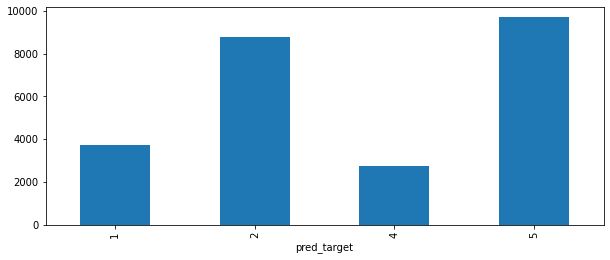

In [56]:
# 예측값 epochs=5
test_df.groupby('pred_target').count()['id'].plot.bar(figsize=(10,4))

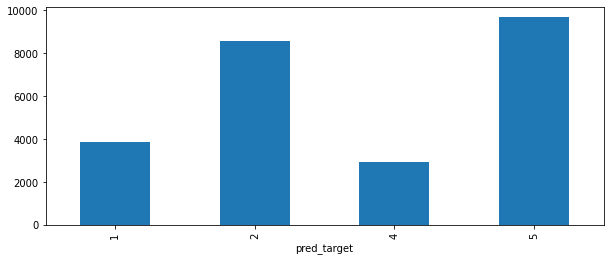

In [36]:
# 예측값 epochs=10
test_df.groupby('pred_target').count()['id'].plot.bar(figsize=(10,4))

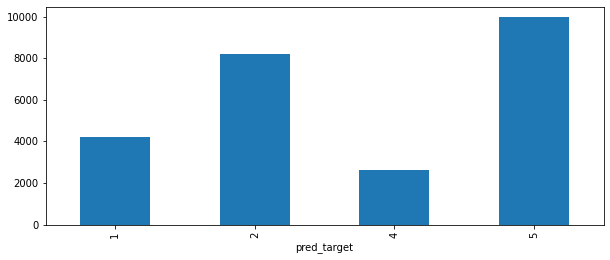

In [ ]:
# 예측값 epochs=15
test_df.groupby('pred_target').count()['id'].plot.bar(figsize=(10,4))

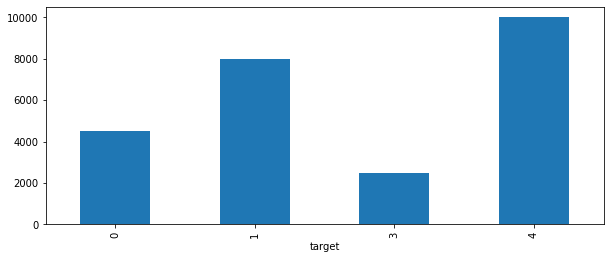

In [ ]:
# 훈련용 실제값
train_df.groupby('target').count()['id'].plot.bar(figsize=(10,4))

### 7. 예측값 저장 (제출용)

- sample_submissions 로딩
- test_df 병합
- submissions 저장

In [57]:
data_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# 제출용 파일 불러오기
submission = pd.read_csv(f'{data_path}/sample_submission.csv') 
print(submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      25000 non-null  int64
 1   target  25000 non-null  int64
dtypes: int64(2)
memory usage: 390.8 KB
None


In [58]:
# 예측값을 제출용 DF과 합치기 (NaN값 포함)

# left join: drop 된 rows 은 NaN 처리
submission_pred = pd.merge( 
    submission, 
    test_df[['id','pred_target']], 
    on='id',
    how='left'       # left, outer, right
    )
print('after MERGE:', submission_pred.shape )

# left join 으로 인한 NaN 조회
print(submission_pred.isna().sum())

# NaN 행 확인 (9개 행 맞음)
submission_pred[ submission_pred.isna().any(axis=1) ]

# merge 되면서 pred_target 이 float 로 바뀌었음 (왜지?)

# df1.join(df2) : 기본적으로 left join
# pd.merge(df1, df2, left_index=True, right_index=True) : 기본 inner join
# pd.concat([df1, df2], axis=1) : 기본 outer join

after MERGE: (25000, 3)
id             0
target         0
pred_target    9
dtype: int64


,id,target,pred_target
2989,2989,0,NaN
4994,4994,0,NaN
6621,6621,0,NaN
10889,10889,0,NaN
10901,10901,0,NaN
11422,11422,0,NaN
11881,11881,0,NaN
21228,21228,0,NaN
23708,23708,0,NaN


In [59]:
# NaN 값을 포함한 컬럼의 형 변환시에는
# nullable 가능한 pd.Int64Dtype() 으로 바꿔야 가능
submission_pred['target'] = submission_pred['pred_target'].astype('Int8')

# 기존 target 컬럼 삭제
submission_pred = submission_pred.drop(columns=['pred_target'])

# 확인
submission_pred.dtypes

# **참고: 컬럼 이름 변경 
# submission_pred = submission_pred.rename(columns={'pred_target' : 'target'})

id        int64
target     Int8
dtype: object

In [60]:
import pandas as pd
data_path="/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# submission.csv 저장
submission_pred.to_csv(data_path+'/submission_v6_5.csv', index=False, encoding='utf-8')

# ==> 채점 0.647 ()
!ls -l /gdrive/MyDrive/Colab\ Notebooks/제주ICT-AI분석반-쇼핑몰분석/data/submission_*

-rw------- 1 root root 188891 Jul 28 02:49 '/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data/submission_v6_4.csv'
-rw------- 1 root root 188891 Jul 28 03:16 '/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data/submission_v6_5.csv'


In [61]:
# 다운로드 (구글 드라이브에서 안보여도 가능)
from google.colab import files
files.download( data_path+'/submission_v6_5.csv' ) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>